
1. create an ODE model (based on Vilar et al.) for transcription with 5 variables: transcription factor, free promoter, bound promoter, mRNA, protein. Plot a typical time course of these variables


In [9]:
def transcription_model(t, s, k_on, k_off, alpha, beta, delta_m, delta_p):
    tf, p_free, p_bound, mrna, protein = s
    
    # Reactions
    binding = k_on * tf * p_free
    unbinding = k_off * p_bound
    transcription = alpha * p_bound
    translation = beta * mrna
    mrna_decay = delta_m * mrna
    protein_decay = delta_p * protein
    
    # Derivatives
    dtf_dt = 0  # constant for task 1
    dp_free_dt = -binding + unbinding
    dp_bound_dt = binding - unbinding
    dmrna_dt = transcription - mrna_decay
    dprotein_dt = translation - protein_decay
    
    return [dtf_dt, dp_free_dt, dp_bound_dt, dmrna_dt, dprotein_dt]

In [10]:
# Cell 2 - Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-v0_8-poster')

In [11]:
# Cell 3 - Set parameters and solve
# Define rate constants (you'll need to experiment with these)
k_on = 0.1      # binding rate
k_off = 0.01    # unbinding rate
alpha = 1.0     # transcription rate
beta = 0.5      # translation rate
delta_m = 0.1   # mRNA degradation
delta_p = 0.05  # protein degradation

# Initial conditions: [tf, p_free, p_bound, mrna, protein]
y0 = [10, 1, 0, 0, 0]  # start with some TF and free promoter

# Time span
t_span = [0, 100]
t_eval = np.arange(0, 100, 0.1)

# Solve the ODE (need to pass parameters as args)
sol_normal = solve_ivp(
    lambda t, s: transcription_model(t, s, k_on, k_off, alpha, beta, delta_m, delta_p),
    t_span=t_span,
    y0=y0,
    t_eval=t_eval,
    atol=1e-8,
    rtol=1e-8
)

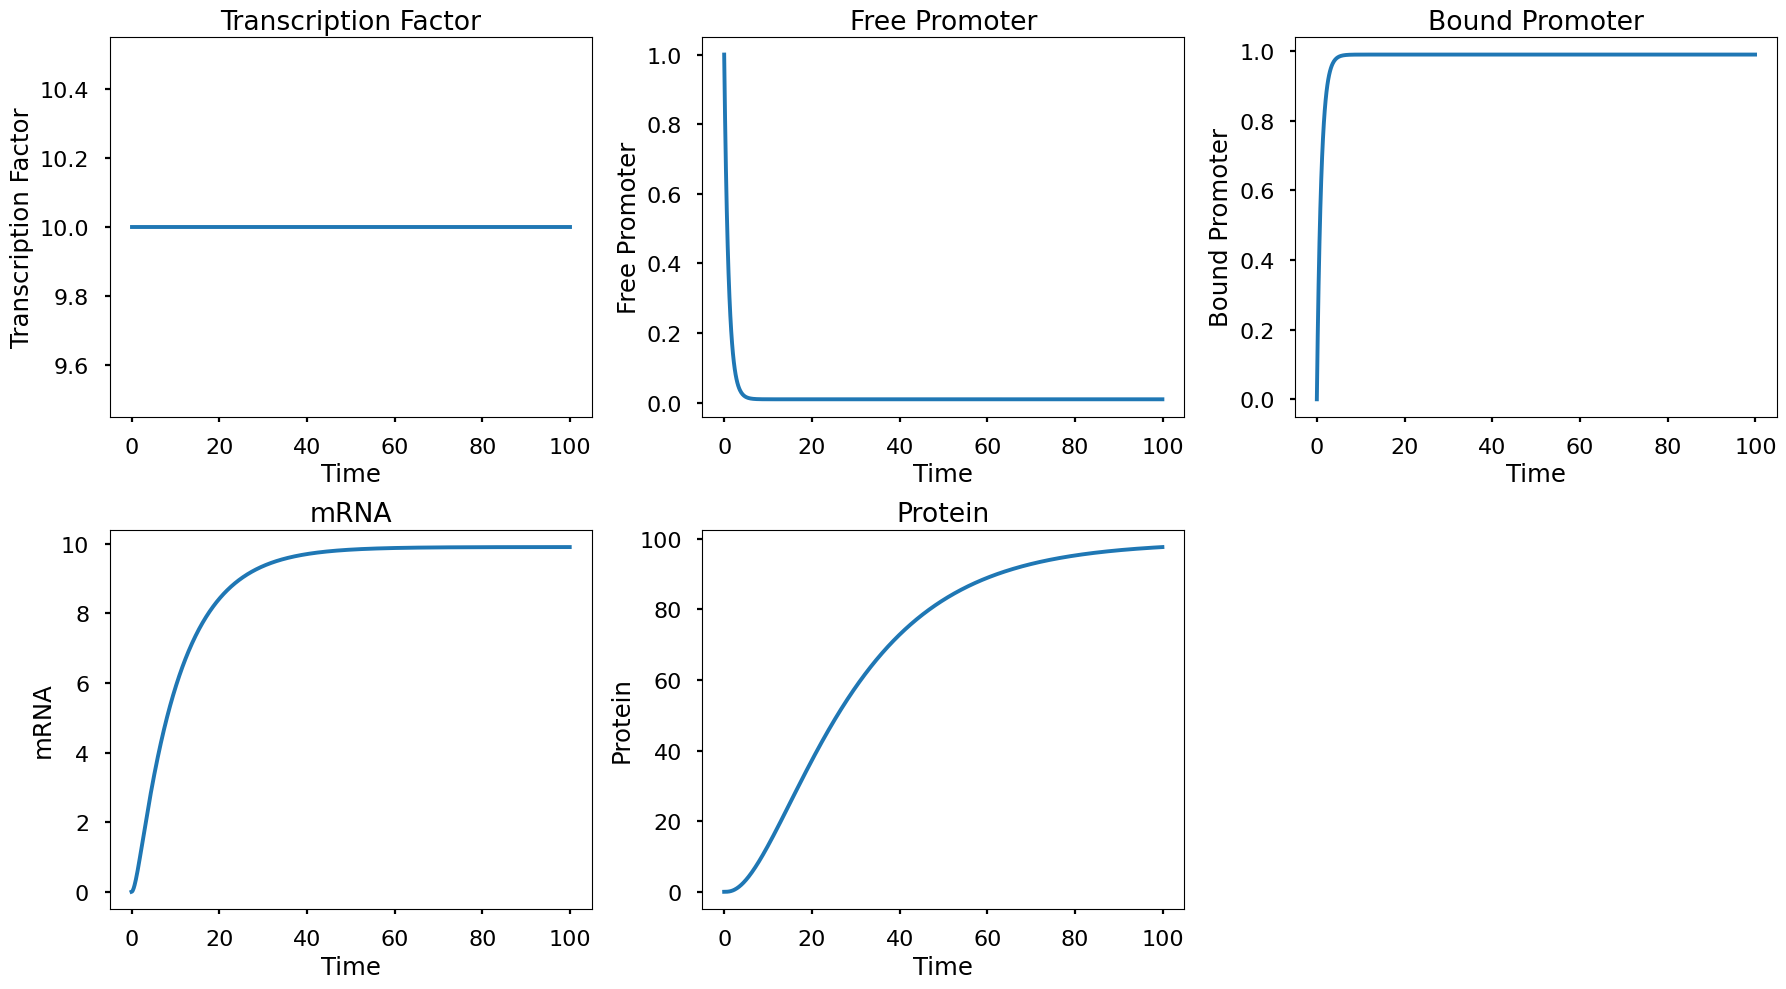

In [12]:
# Cell 4 - Plot the time course
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot each variable
axes[0, 0].plot(sol_normal.t, sol_normal.y[0])
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Transcription Factor')
axes[0, 0].set_title('Transcription Factor')

axes[0, 1].plot(sol_normal.t, sol_normal.y[1])
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Free Promoter')
axes[0, 1].set_title('Free Promoter')

axes[0, 2].plot(sol_normal.t, sol_normal.y[2])
axes[0, 2].set_xlabel('Time')
axes[0, 2].set_ylabel('Bound Promoter')
axes[0, 2].set_title('Bound Promoter')

axes[1, 0].plot(sol_normal.t, sol_normal.y[3])
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('mRNA')
axes[1, 0].set_title('mRNA')

axes[1, 1].plot(sol_normal.t, sol_normal.y[4])
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Protein')
axes[1, 1].set_title('Protein')

# Hide the empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

2. Modify the model to describe auto-regulation: the transcription factor is the product of the gene. Consider both positive and negative auto-regulation.


In [13]:
def positive_autoregulation(t, s, k_on, k_off, alpha, beta, delta_m, delta_p):
    p_free, p_bound, mrna, protein = s
    
    # Protein acts as its own TF (positive feedback)
    binding = k_on * protein * p_free     # protein promotes binding
    unbinding = k_off * p_bound
    transcription = alpha * p_bound        # more binding → more transcription
    translation = beta * mrna
    mrna_decay = delta_m * mrna
    protein_decay = delta_p * protein
    
    dp_free_dt = -binding + unbinding
    dp_bound_dt = binding - unbinding
    dmrna_dt = transcription - mrna_decay
    dprotein_dt = translation - protein_decay
    
    return [dp_free_dt, dp_bound_dt, dmrna_dt, dprotein_dt]

def negative_autoregulation(t, s, k_on, k_off, alpha, beta, delta_m, delta_p):
    p_free, p_bound, mrna, protein = s
    
    # Protein acts as its own repressor (negative feedback)
    binding = k_on * protein * p_free
    unbinding = k_off * p_bound
    transcription = alpha * p_free         # only FREE promoter makes mRNA
    translation = beta * mrna
    mrna_decay = delta_m * mrna
    protein_decay = delta_p * protein
    
    dp_free_dt = -binding + unbinding
    dp_bound_dt = binding - unbinding
    dmrna_dt = transcription - mrna_decay  # bound promoter is silent
    dprotein_dt = translation - protein_decay
    
    return [dp_free_dt, dp_bound_dt, dmrna_dt, dprotein_dt]

In [17]:
# Define parameters (same for both models for fair comparison)
k_on = 0.1
k_off = 0.01
alpha = 1.0
beta = 0.5
delta_m = 0.1
delta_p = 0.05

# Initial conditions: [p_free, p_bound, mrna, protein]
y0 = [1, 0, 0, 5]  # start with free promoter and small amount of protein

# Time span
t_span = [0, 100]
t_eval = np.arange(0, 100, 0.1)

# Solve POSITIVE autoregulation
sol_positive = solve_ivp(
    lambda t, s: positive_autoregulation(t, s, k_on, k_off, alpha, beta, delta_m, delta_p),
    t_span=t_span,
    y0=y0,
    t_eval=t_eval,
    atol=1e-8,
    rtol=1e-8
)

# Solve NEGATIVE autoregulation
sol_negative = solve_ivp(
    lambda t, s: negative_autoregulation(t, s, k_on, k_off, alpha, beta, delta_m, delta_p),
    t_span=t_span,
    y0=y0,
    t_eval=t_eval,
    atol=1e-8,
    rtol=1e-8
)

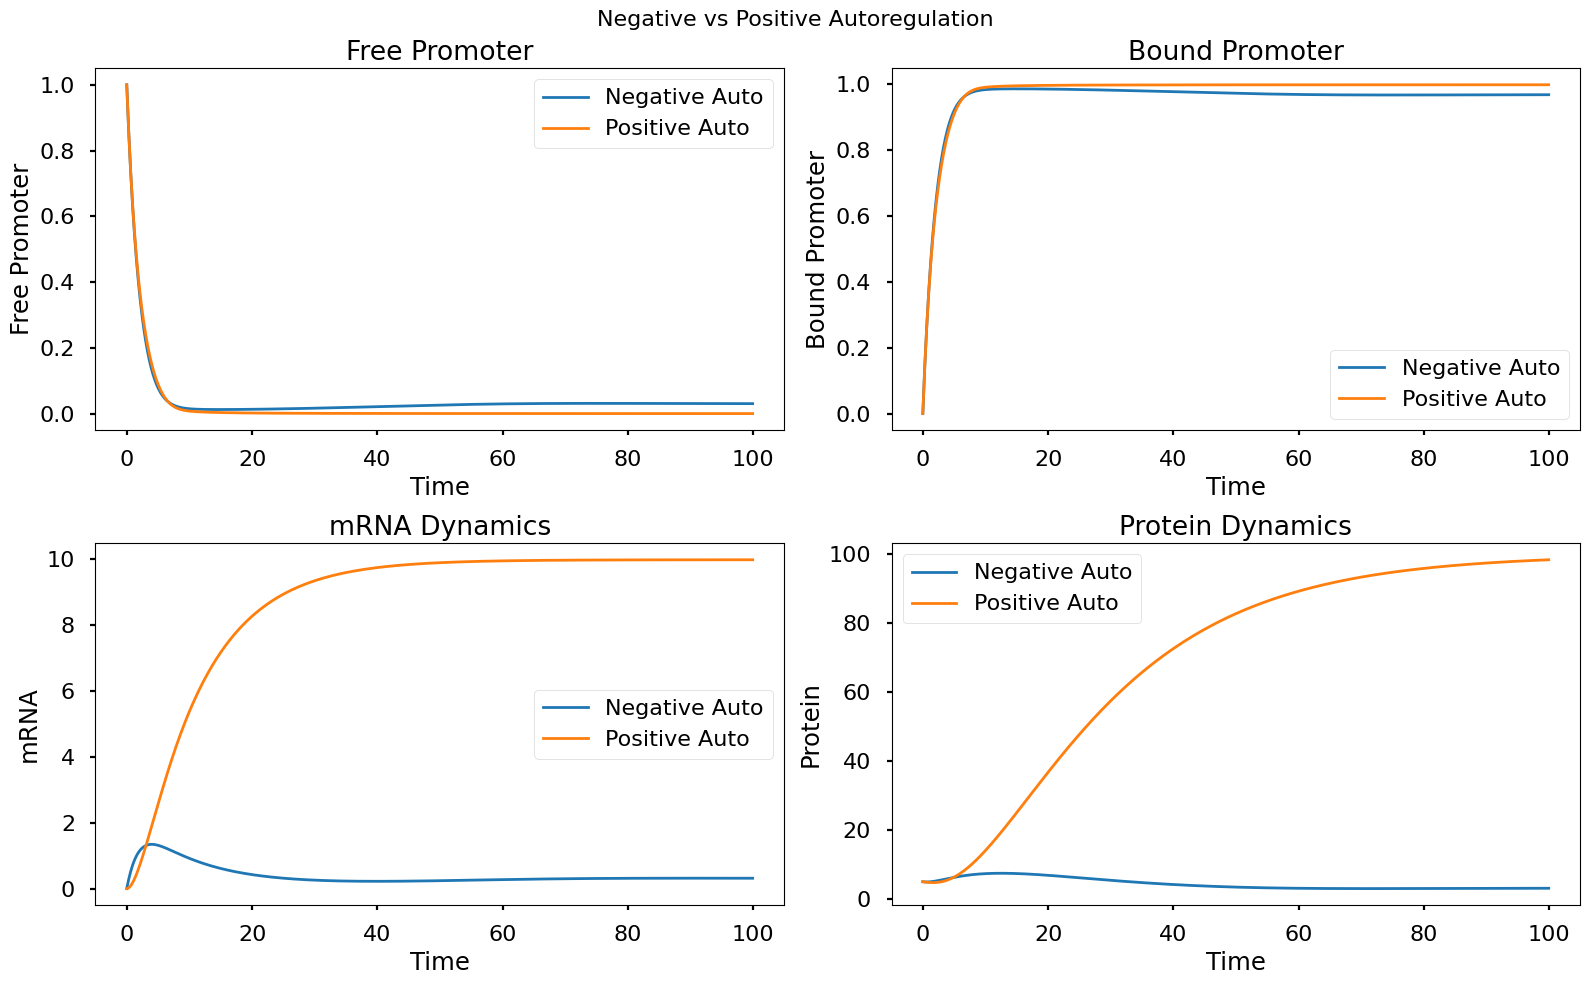

In [18]:
# Compare Normal vs Positive Autoregulation
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Free Promoter
axes[0, 0].plot(sol_negative.t, sol_negative.y[0], label='Negative Auto', linewidth=2)
axes[0, 0].plot(sol_positive.t, sol_positive.y[0], label='Positive Auto', linewidth=2)
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Free Promoter')
axes[0, 0].set_title('Free Promoter')
axes[0, 0].legend()

# Bound Promoter
axes[0, 1].plot(sol_negative.t, sol_negative.y[1], label='Negative Auto', linewidth=2)
axes[0, 1].plot(sol_positive.t, sol_positive.y[1], label='Positive Auto', linewidth=2)
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Bound Promoter')
axes[0, 1].set_title('Bound Promoter')
axes[0, 1].legend()

# mRNA
axes[1, 0].plot(sol_negative.t, sol_negative.y[2], label='Negative Auto', linewidth=2)
axes[1, 0].plot(sol_positive.t, sol_positive.y[2], label='Positive Auto', linewidth=2)
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('mRNA')
axes[1, 0].set_title('mRNA Dynamics')
axes[1, 0].legend()

# Protein
axes[1, 1].plot(sol_negative.t, sol_negative.y[3], label='Negative Auto', linewidth=2)
axes[1, 1].plot(sol_positive.t, sol_positive.y[3], label='Positive Auto', linewidth=2)
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Protein')
axes[1, 1].set_title('Protein Dynamics')
axes[1, 1].legend()

plt.suptitle('Negative vs Positive Autoregulation', fontsize=16)
plt.tight_layout()
plt.show()

3. Reproduce the full transcriptional oscillator model of Vilar et al.


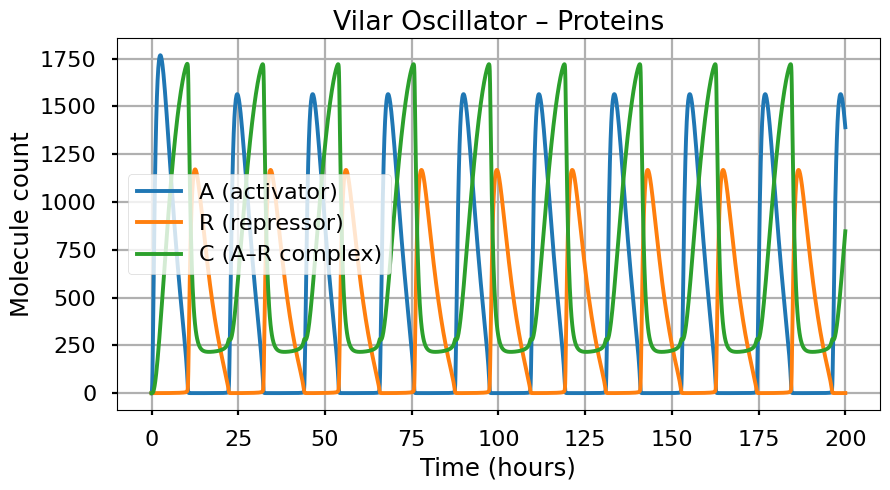

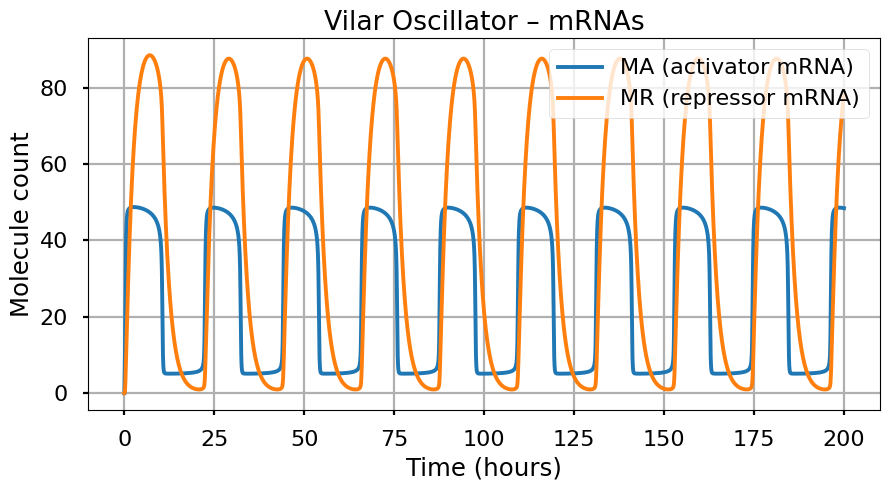

In [16]:
import sys
sys.path.append("/mnt/data")  # or your path

from vilar_model import default_params, vilar_full, simulate_scipy
import matplotlib.pyplot as plt

p = default_params()
y0 = [1,0,1,0,0,0,0,0,0]  # DA, DAp, DR, DRp, MA, MR, A, R, C

def rhs(t, s):  # uses corrected vilar_full in the module
    return vilar_full(t, s, p)

# integrate 0..200 h with a stiff solver
ts, Y = simulate_scipy(rhs, y0, 0.0, 200.0, max_step=0.1)
DA, DAp, DR, DRp, MA, MR, A, R, C = Y

# Proteins
plt.figure(figsize=(9,5))
plt.plot(ts, A, label="A (activator)")
plt.plot(ts, R, label="R (repressor)")
plt.plot(ts, C, label="C (A–R complex)")
plt.xlabel("Time (hours)"); plt.ylabel("Molecule count"); plt.title("Vilar Oscillator – Proteins")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# mRNAs
plt.figure(figsize=(9,5))
plt.plot(ts, MA, label="MA (activator mRNA)")
plt.plot(ts, MR, label="MR (repressor mRNA)")
plt.xlabel("Time (hours)"); plt.ylabel("Molecule count"); plt.title("Vilar Oscillator – mRNAs")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

4. Bonus: try to formulate the same problem as an event-driven simulation